In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import csv

In [40]:
PERIOD = 50
PENDULUM_LENGTH = 0.74
LENGTH_MISTAKE = 0.01
FREQ_MISTAKE = 0.015

In [ ]:
COUNTDOWN_FLAG = 0
snapshots = []
current_time = 0

# Read trackbar data
trackbar_dict = {}
with open("trackbar_memory.json", "r") as outfile:
     trackbar_dict = json.load(outfile)

def nothing(i):
    pass

# Creating trackbars
cv2.namedWindow("mask")
cv2.createTrackbar("low_blue", "mask", trackbar_dict['low_blue'], 255, nothing)
cv2.createTrackbar("low_green", "mask", trackbar_dict['low_green'], 255, nothing)
cv2.createTrackbar("low_red", "mask", trackbar_dict['low_red'], 255, nothing)
cv2.createTrackbar("high_blue", "mask", trackbar_dict['high_blue'], 255, nothing)
cv2.createTrackbar("high_green", "mask", trackbar_dict['high_green'], 255, nothing)
cv2.createTrackbar("high_red", "mask", trackbar_dict['high_red'], 255, nothing)

cam = cv2.VideoCapture(0)

while True:
    success, frame = cam.read()

    if not success:
        break
    
    # Calibrate mask
    trackbar_dict['low_blue'] = cv2.getTrackbarPos("low_blue", "mask")
    trackbar_dict['low_green'] = cv2.getTrackbarPos("low_green", "mask")
    trackbar_dict['low_red'] = cv2.getTrackbarPos("low_red", "mask")
    trackbar_dict['high_blue'] = cv2.getTrackbarPos("high_blue", "mask")
    trackbar_dict['high_green'] = cv2.getTrackbarPos("high_green", "mask")
    trackbar_dict['high_red'] = cv2.getTrackbarPos("high_red", "mask")
    mask = cv2.inRange(frame, (trackbar_dict['low_blue'], trackbar_dict['low_green'], trackbar_dict['low_red']), 
                       (trackbar_dict['high_blue'], trackbar_dict['high_green'], trackbar_dict['high_red']))
    
    # Erosion
    kernel = np.ones((3, 3))
    eroded = cv2.erode(mask, kernel, iterations=3)

    # Analysing connected components
    output = cv2.connectedComponentsWithStats(eroded)
    num_components = output[0]
    stats = output[2]

    for i in range(num_components):
        top    = stats[i, cv2.CC_STAT_TOP]
        left   = stats[i, cv2.CC_STAT_LEFT]
        width  = stats[i, cv2.CC_STAT_WIDTH]
        height = stats[i, cv2.CC_STAT_HEIGHT]
        area   = stats[i, cv2.CC_STAT_AREA]

        if area > 6000 and area < 30000:
            cv2.rectangle(frame, (left, top), (left + width, top + height), (20, 255, 20), 3)
            if COUNTDOWN_FLAG:
                snapshots.append((current_time, left))
        
    cv2.imshow("image", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("eroded", eroded)
    
    key = cv2.waitKey(PERIOD) & 0xFF
    current_time += PERIOD
    if key == ord('q'):
        break
    if key == ord('s'):
        with open("trackbar_memory.json", "w") as outfile:
            json.dump(trackbar_dict, outfile)
    if key == ord('n'):
        COUNTDOWN_FLAG = 1
    if key == ord('m'):
        COUNTDOWN_FLAG = 0

time_list = []
coordinates_list = []
for element in snapshots:
    time_list.append(element[0])
    coordinates_list.append(element[1])

#with open('data.csv', mode='w', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerow(['Time (ms)', 'Coordinates'])
#    
#    for time, coord in zip(time_list, coordinates_list):
#        writer.writerow([time, coord])

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(30)

QObject::moveToThread: Current thread (0x395fb100) is not the object's thread (0x397f7270).
Cannot move to target thread (0x395fb100)

QObject::moveToThread: Current thread (0x395fb100) is not the object's thread (0x397f7270).
Cannot move to target thread (0x395fb100)

QObject::moveToThread: Current thread (0x395fb100) is not the object's thread (0x397f7270).
Cannot move to target thread (0x395fb100)

QObject::moveToThread: Current thread (0x395fb100) is not the object's thread (0x397f7270).
Cannot move to target thread (0x395fb100)

QObject::moveToThread: Current thread (0x395fb100) is not the object's thread (0x397f7270).
Cannot move to target thread (0x395fb100)

QObject::moveToThread: Current thread (0x395fb100) is not the object's thread (0x397f7270).
Cannot move to target thread (0x395fb100)

QObject::moveToThread: Current thread (0x395fb100) is not the object's thread (0x397f7270).
Cannot move to target thread (0x395fb100)

QObject::moveToThread: Current thread (0x395fb100) is n

-1

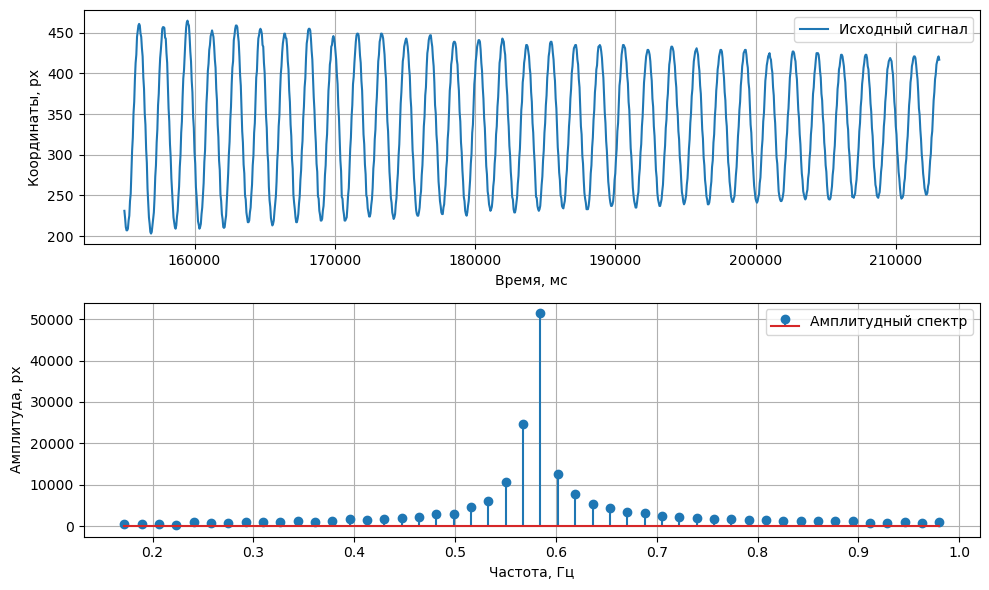

In [35]:
n = len(coordinates_list)
fft_result = np.fft.fft(coordinates_list)[10:n//20]
freq = np.fft.fftfreq(n, d=PERIOD / 1000)[10:n//20]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_list, coordinates_list, label='Исходный сигнал')
plt.xlabel('Время, мс')
plt.ylabel('Координаты, px')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(freq, np.abs(fft_result), label= 'Амплитудный спектр')
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, px')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [42]:
max_amplitude_index = np.argmax(np.abs(fft_result))
dominant_frequency = freq[max_amplitude_index]

g = (2 * np.pi * dominant_frequency) ** 2 * PENDULUM_LENGTH
dg = g * (LENGTH_MISTAKE / PENDULUM_LENGTH + FREQ_MISTAKE / dominant_frequency)
print(f"Частота колебаний:{dominant_frequency:.3f} Гц")
print(f"Ускорение свободного падения:({g:.3f} pm {dg:.3f}) м/(с^2)")

Частота колебаний:0.585 Гц
Ускорение свободного падения:(9.987 pm 0.391) м/(с^2)
